# Faire des dico pour recup valeurs correspondantes des colonnes

### /!\ A SUPPRIMER AVANT DE RENDRE /!\

###### https://github.com/CyrilShch/Drugs.-Predict-drug-consumption-using-a-set-of-demographic-data-and-five-personality-measurements/blob/master/hw2_Kirill_Shcherbakov-1.ipynb

### Import des premières librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Read the dataframe
df=pd.read_csv("drug_consumption.csv",sep=";")
copy_df = df.copy() #if needed

In [3]:
df.head(5)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


# About the data...
### The attributes:
##### 1. ID is number of record in original database. Cannot be related to participant. It can be used for reference only.
##### 2. Age is age of participant
##### 3. Gender is gender of participant
##### 4. Education is level of education of participant
##### 5. Country is country of current residence of participant
##### 6. Ethnicity is ethnicity of participant
##### 7. Nscore is NEO-FFI-R Neuroticism
##### 8. Escore is NEO-FFI-R Extraversion
##### 9. Oscore is NEO-FFI-R Openness to experience
##### 10. Ascore is NEO-FFI-R Agreeableness
##### 11. Cscore is NEO-FFI-R Conscientiousness
##### 12. Impulsive is impulsiveness measured by BIS-11
##### 13. SS is sensation seeing measured by ImpSS
##### 14. Alcohol is class of alcohol consumption
##### 15. Amphet is class of amphetamines consumption
##### 16. Amyl is class of amyl nitrite consumption
##### 17. Benzos is class of benzodiazepine consumption
##### 18. Caff is class of caffeine consumption
##### 19. Cannabis is class of cannabis consumption
##### 20. Choc is class of chocolate consumption
##### 21. Coke is class of cocaine consumption
##### 22. Crack is class of crack consumption
##### 23. Ecstasy is class of ecstasy consumption
##### 24. Heroin is class of heroin consumption
##### 25. Ketamine is class of ketamine consumption
##### 26. Legalh is class of legal highs consumption
##### 27. LSD is class of LSD consumption
##### 28. Meth is class of methadone consumption
##### 29. Mushrooms is class of magic mushrooms consumption
##### 30. Nicotine is class of nicotine consumption
##### 31. Semer is class of fictitious drug Semeron consumption
##### 32. VSA is class of volatile substance abuse consumption

In [4]:
len(df)

1885

In [5]:
#Count the numer of missing values
df.isna().sum()

#There is no missing values

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

In [6]:
df.nunique()

#We have 1885 observations with 1885 IDs

ID           1885
Age             6
Gender          2
Education       9
Country         7
Ethnicity       7
Nscore         49
Escore         42
Oscore         35
Ascore         41
Cscore         41
Impulsive      10
SS             11
Alcohol         7
Amphet          7
Amyl            7
Benzos          7
Caff            7
Cannabis        7
Choc            7
Coke            7
Crack           7
Ecstasy         7
Heroin          7
Ketamine        7
Legalh          7
LSD             7
Meth            7
Mushrooms       7
Nicotine        7
Semer           5
VSA             7
dtype: int64

In [7]:
df.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


#### We don't need the ID in our statistics and predictions so we can delete this column

In [8]:
del df['ID']

## Number of people per country

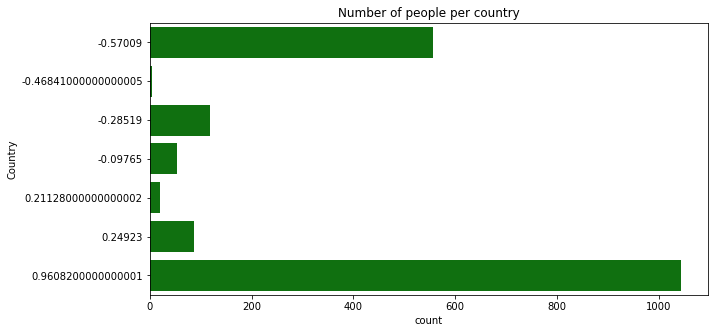

In [9]:
f, ax = plt.subplots(figsize=(10, 5))
sns.countplot(y="Country", data=df, color="g");
plt.title('Number of people per country');

###### We see that there is almost only UK and USA people

## Number of people per ethnicity

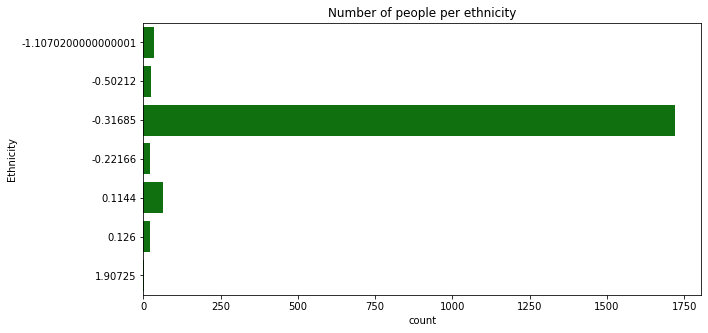

In [10]:
f, ax = plt.subplots(figsize=(10, 5))
sns.countplot(y="Ethnicity", data=df, color="g");
plt.title('Number of people per ethnicity');

###### There is almost only white people

## Number of people per education

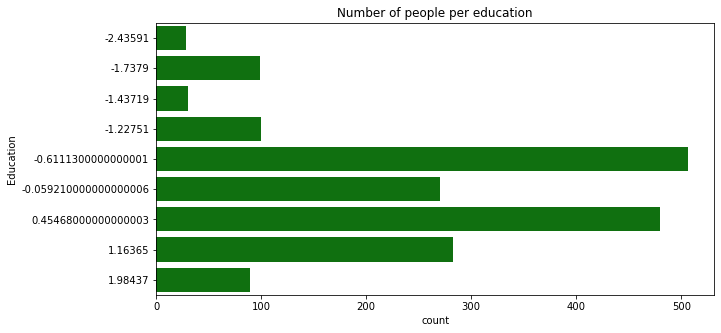

In [11]:
f, ax = plt.subplots(figsize=(10, 5))
sns.countplot(y="Education", data=df, color="g");
plt.title('Number of people per education');

###### Education has a better distribution

##### CONCLUSION : We won't be able to predict the drug consumption according to the ethnicity and the country! We can drop these features !

In [12]:
del df['Ethnicity']
del df['Country']

# Class participants into groups: users and non-users
##### The different usages are : ‘Used in last day’ , ‘Used in last week’, ‘Used in last month’, ‘Used in last year’ , ‘Used in last decade’, ‘Never used’, ‘Used over a decade ago’
##### Thus, the users will be those that belong to ‘Used in last day’ , ‘Used in last week’, ‘Used in last month’, and the others will be non-users

##### The goal is to have 1's if the person is concidered as a user et 0's in the other case. Doing so, is will be easier to have a classification algorithm...

In [13]:
# 1 = Users
# 0 = Non-users

def user(a):
    if ((a == 'CL6') or (a == 'CL5') or (a == 'CL4') ):
        a = 1
    elif ((a == 'CL0') or (a == 'CL1') or (a == 'CL2') or (a == 'CL3')):
        a = 0
    return a

In [14]:
# Applying our changes in classification of drug consumption to columns with drugs
col=['Amphet','Amyl','Benzos','Cannabis','Coke','Crack','Ecstasy','Heroin','Ketamine','LSD','Meth','Mushrooms','Semer','VSA','Alcohol','Legalh','Nicotine','Choc','Caff']

for c in col:
    df[c] = df[c].map(user)

## Different types of drugs : classification
###### 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy',  'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA'

In [15]:
#Distintion drogues dures et drogues douces ? NON

#Cette distinction entre drogues « douces » et « dures », utilisée parfois même dans les milieux 
#scientifiques, est sans rapport avec la réalité, et sans doute davantage liée à leur acceptation sociale. De nos jours, 
#les experts et acteurs de terrain préfèrent appliquer les qualificatifs de « dur » et « doux » aux usages qui sont faits 
#des substances plutôt qu’aux substances elles-mêmes : il est en effet possible de faire un usage « dur » d’une substance 
#perçue comme « douce », tout comme on peut observer des usages « doux » (maîtrisés et non problématiques) de substances 
#réputées « dures »…

#-----------------------------------------------

#According to the classification available on : https://www.health.gov.au/health-topics/drugs/about-drugs/types-of-drugs

# Depressants: Alcohol, Amyl, Benzos, Cannabis, Ketamine, Heroin, VSA
# Stimulants: Amphet, Caff, Coke, Meth, Nicotine, Crack, Ecstasy
# Psychedelics: LSD, Mushrooms
# Psychoactive: Legalh

#We just can't join Choc (chocolate) and Semer (semeron, fictional drug) to a group...

In [16]:
df['Depressants'] = df.apply(lambda x: int((x['Alcohol'] + x['Amyl'] + x['Benzos'] + x['Cannabis']+ x['Ketamine']+ x['Heroin']+ x['VSA'])>0), axis = 1)

df['Stimulants'] = df.apply(lambda x: int((x['Amphet'] + x['Caff'] + x['Coke'] + x['Meth']+ x['Nicotine']+ x['Crack']+ x['Ecstasy'])>0), axis = 1)

df['Psychedelics'] = df.apply(lambda x: int((x['LSD'] + x['Mushrooms'])>0), axis = 1)

#and the others...

In [17]:
df.drop(['Caff','Nicotine','Alcohol','Amphet','Amyl','Benzos', 'Cannabis', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'LSD', 'Meth', 'Mushrooms', 'VSA'], axis = 1, inplace = True)

In [18]:
drugs=['Choc', 'Legalh', 'Semer', 'Depressants', 'Stimulants', 'Psychedelics']
df[drugs].apply(pd.Series.value_counts).T

,0,1
Choc,99,1786
Legalh,1644,241
Semer,1884,1
Depressants,172,1713
Stimulants,79,1806
Psychedelics,1638,247


##### We see that tere is only one user of Semer, so we can drop this drug that won't help us

In [19]:
del df['Semer']

In [20]:
drugs

['Choc', 'Legalh', 'Semer', 'Depressants', 'Stimulants', 'Psychedelics']

## Plot the number of users and non-users for each drug class

Cheat-Sheet: 0 = Non-User, 1 = User


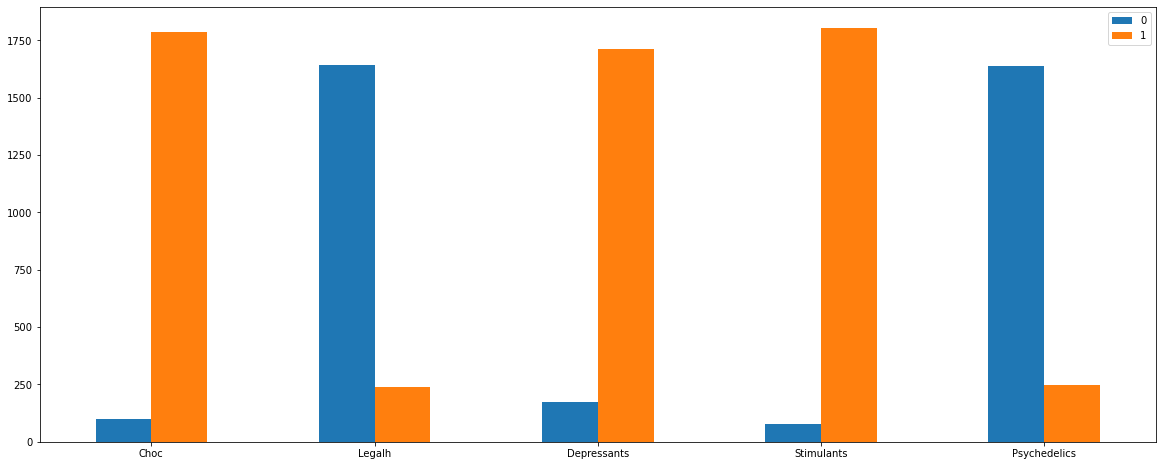

In [21]:
drugs=['Choc', 'Legalh', 'Depressants', 'Stimulants', 'Psychedelics']
print("Cheat-Sheet: 0 = Non-User, 1 = User")
df[drugs].apply(pd.Series.value_counts).T.plot(kind='bar',rot=0, figsize=(20,8));

# Decoding
##### To better understand some features :) (we will encode them with get_dummies() after...)

### Decode Age column

##### 18-24 age = 0
##### 25-34 age = 1
##### 35-44 age = 2
##### 45-54 age = 3
##### 55-64 age = 4
##### 65+   age = 5

In [22]:
# NB: After trying the function bellow, there is a problem with the float of the Age variable ! (same for Gender, ect...)
def toFormat(x):
    return float('{:.5f}'.format(x))

In [23]:
for col in list(df.columns):
    df[col] = df[col].map(toFormat)

In [24]:
def toAge(x):
    if (x == -0.95197):
        x = 0
    elif (x == -0.07854):
        x = 1
    elif (x == 0.49788):
        x = 2
    elif (x == 1.09449):
        x = 3
    elif (x == 1.82213):
        x = 4
    elif (x == 2.59171):
        x = 5
    return x

df['Age'] = df['Age'].map(toAge)

### Decode Gender

##### Female = 0
##### Male = 1

In [25]:
def toGender(x):
    if (x == 0.48246 ):
        x = 0
    elif (x == -0.48246 ):
        x = 1
    return x

df['Gender'] = df['Gender'].map(toGender)

### Decode Education

##### Left school before 16 years = 0
##### Left school at 16 years = 1
##### Left school at 17 years = 2
##### Left school at 18 years = 3
##### Some college or university, no certificate or degree = 4
##### Professional certificate/ diploma = 5
##### University degree = 6
##### Masters degree = 7
##### Doctorate degree = 8

In [26]:
def toEducation(x):
    if (x == -2.43591):
        x = 0
    elif (x == -1.73790):
        x = 1
    elif (x == -1.43719):
        x = 2
    elif (x == -1.22751):
        x = 3
    elif (x == -0.61113):
        x = 4
    elif (x == -0.05921):
        x = 5
    elif (x == 0.45468):
        x = 6
    elif (x == 1.16365):
        x = 7
    elif (x == 1.98437):
        x = 8
    return x

df['Education'] = df['Education'].map(toEducation)

# Correlation

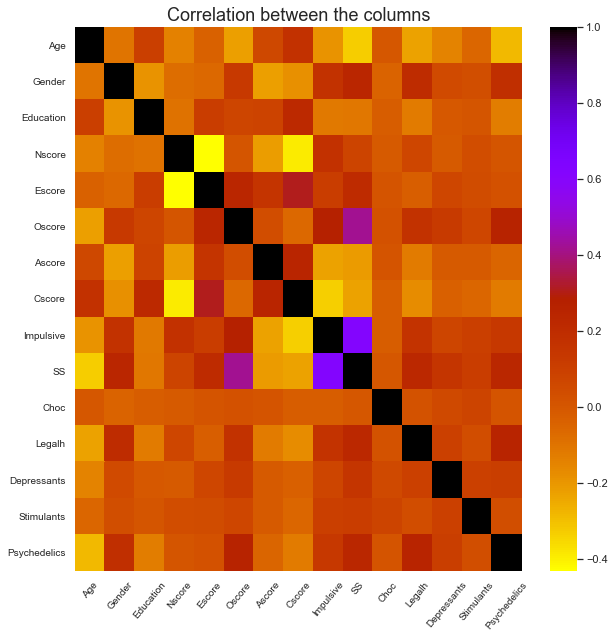

In [27]:
cm = df.corr()

plt.figure(figsize=(10,10))

sns.set(font_scale=1)
hm = sns.heatmap(cm,cmap = 'gnuplot_r', yticklabels = df.columns, xticklabels = df.columns)
plt.xticks(fontsize=10,rotation=50)
plt.yticks(fontsize=10)
plt.title("Correlation between the columns",fontsize=18)
plt.show()

##### There is not much correlation between the features. Excpept maybe between Impulsivity and SS, and between Oscore ans SS

# Encoding
###### We have som categorical variables in our dataset. First we can think that they are already encoded because they are numerical, but we saw in practice that giving particular values to the data can give a weigh to these. Our objective is that each value of a feature has the same weigh, to do so we will use get_dummies()


In [28]:
dummies_education = pd.get_dummies(df["Education"], prefix = 'Education')
df = pd.concat([df, dummies_education], axis = 1)

dummies_age = pd.get_dummies(df["Age"], prefix = 'Age')
df = pd.concat([df, dummies_age], axis = 1)

dummies_gender = pd.get_dummies(df["Gender"], prefix = 'Gender')
df = pd.concat([df, dummies_gender], axis = 1)

df=df.drop(['Education','Age','Gender'], axis=1)

In [29]:
df

,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Choc,Legalh,Depressants,...,Education_7,Education_8,Age_0,Age_1,Age_2,Age_3,Age_4,Age_5,Gender_0,Gender_1
0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1.0,0.0,1.0,...,0,0,0,0,1,0,0,0,1,0
1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1.0,0.0,1.0,...,0,1,0,1,0,0,0,0,0,1
2,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,1
3,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1.0,0.0,1.0,...,1,0,1,0,0,0,0,0,1,0
4,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1.0,0.0,1.0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,1.0,0.0,1.0,...,0,0,1,0,0,0,0,0,1,0
1881,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,1.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,1
1882,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,1.0,0.0,1.0,...,0,0,0,1,0,0,0,0,1,0
1883,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,1.0,0.0,1.0,...,0,0,1,0,0,0,0,0,1,0


# LET'S MAKE PREDICTIONS ! :)

In [30]:
from sklearn.model_selection import train_test_split

feature_col_names = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS',
       'Education_0', 'Education_1', 'Education_2', 'Education_3',
       'Education_4', 'Education_5', 'Education_6', 'Education_7',
       'Education_8', 'Age_0', 'Age_1', 'Age_2', 'Age_3', 'Age_4', 'Age_5',
       'Education_0', 'Education_1', 'Education_2', 'Education_3',
       'Education_4', 'Education_5', 'Education_6', 'Education_7',
       'Education_8', 'Age_0', 'Age_1', 'Age_2', 'Age_3', 'Age_4', 'Age_5',
       'Gender_0', 'Gender_1']

predicted_class_names = ['Choc', 'Legalh', 'Depressants', 'Stimulants', 'Psychedelics']
predicted_class=['Depressants']

X = df[feature_col_names].values
y = df[predicted_class].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 124)

In [31]:
print(X_train.shape)

(1508, 39)


## Standardize the data

In [32]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X_train) #on ne filtre que sur les data d'entrainement
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test) #on applique la même transformation au jeu de test

##### We want to predict a category (user or not for a drug) for labeled data
##### => We can try these models: SVC, KNN, Decision Tree, Logistic Regression, SVM (Binary Classfication), Random Forest, Neural Network (?)

In [33]:
from sklearn.metrics import roc_curve,auc
from sklearn import metrics

#### Some usefull functions

In [44]:
#found function that plots the confusion matrix
def confusion_metrix(y_test,test_model):
    cm = metrics.confusion_matrix(y_test, test_model)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Non-User','User']
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j]) + " = " + str(cm[i][j]))
    plt.show()

In [59]:
def performance(model):
    #print the predicted class
    test_model = model.predict(X_test)
    print('\033[1m' + "* Predicted class: " + '\033[0m', predicted_class)
    #show the confusion matrix
    print('\033[1m' + "\n* Confusion matrix:" + '\033[0m')
    confusion_metrix(y_test, test_model)
    #show the classification report (with the accuracy, the precision ...)
    print('\033[1m' + "\n* Classification report:\n" + '\033[0m')
    print(metrics.classification_report(y_test, test_model, labels=np.unique(test_model)))

## KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

<ipython-input-46-5b9ebb778e59>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  KNN_model.fit(X_train,y_train)


KNeighborsClassifier()

* Predicted class:  ['Depressants']

* Confusion matrix:


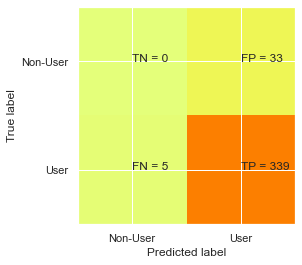


* Classification report:

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        33
         1.0       0.91      0.99      0.95       344

    accuracy                           0.90       377
   macro avg       0.46      0.49      0.47       377
weighted avg       0.83      0.90      0.86       377



In [60]:
performance(KNN_model)
#roc_curves(KNN_model)

## Decision Tree

* Predicted class:  ['Depressants']

* Confusion matrix:


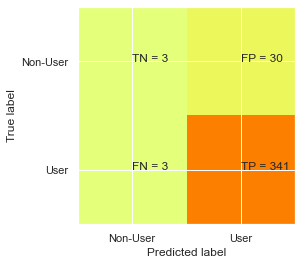


* Classification report:

              precision    recall  f1-score   support

         0.0       0.50      0.09      0.15        33
         1.0       0.92      0.99      0.95       344

    accuracy                           0.91       377
   macro avg       0.71      0.54      0.55       377
weighted avg       0.88      0.91      0.88       377



In [61]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=0)
DT_model.fit(X_train, y_train.ravel())

performance(DT_model)

## SVC
à revoir... on a uniquement de la classe 1 qui est prédite

* Predicted class:  ['Depressants']

* Confusion matrix:


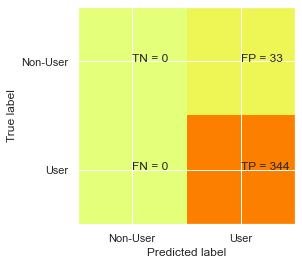


* Classification report:

              precision    recall  f1-score   support

         1.0       0.91      1.00      0.95       344

   micro avg       0.91      1.00      0.95       344
   macro avg       0.91      1.00      0.95       344
weighted avg       0.91      1.00      0.95       344



In [62]:
from sklearn.svm import SVC

SVC_model = SVC(kernel="linear", C=1,random_state=0)
SVC_model.fit(X_train, y_train.ravel())

performance(SVC_model)